# Project report (title)

## Name (ID)

## Question 1


### Introduction

The purpose of this project was to use...

### Procedure

Here you need to describe what you did to solve this question, include proofs, algorithms etc...

Here you need to include your code as well...




### Observations

Here you need to describe the results including graphs.

### Discussion

Here you need to include any interpretations or inferences that you draw on the basis of your observations

### Conclusions

Write a summary of your most important findings

## Question 2

Repeat the previous structure...


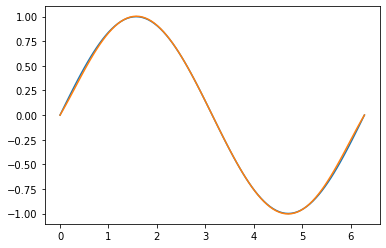

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def coefs(x, y):

    a = y

    for k in range(1, x.size):

        for i in range(0, k):

            a[k] = ((a[k]-a[i])/(x[k]-x[i]))

    return a




def evalp(a, x, z):

    n = a.size-1
    s = a[n]

    for i in range(n-1, -1, -1):
        s = a[i]+((z - x[i])*s)

    return s


func_1 = lambda x: np.sin(x)


x = np.linspace(0, 2*np.pi, 6)
x1 = np.linspace(0, 2*np.pi, 101)
y = func_1(x)
y1 = func_1(x1)
memes = coefs(x, y)
y2 = evalp(memes, x, x1)

plt.plot(x1,y1)
plt.plot(x1, y2)